# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_breast_cancer, make_circles
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import numpy as np

# Metoda Random Frest

1. W metodzie tej tworzymy wiele, **zróżnicowanych** drzew klasyfikacyjnych, których dokładność musi przekraczać 50%, jednak nie może być też zbyt duża, aby modele były rzeczywiście zróżnicowane.  
2. Każdy z tych modeli budujemy jedynie na **`n` wybranych zmiennych**.
3. Drzewa te połączone są ze sobą **równolegle**
4. Ostateczna klasyfikacja dokonywana jest na drodze głosowania przez poszczególne modele.

![alt text](https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png)


## Sztuczny zestaw danych

W tym przykładzie skorzystamy z dostarczonego przez `sklearn` generatora danych do klasyfikacji `make_circles`


In [2]:
X, y = make_circles(n_samples=1000, factor=.7, noise=.1)

### Podgląd wygenerowanego zestawu

Text(0, 0.5, '$x_2$')

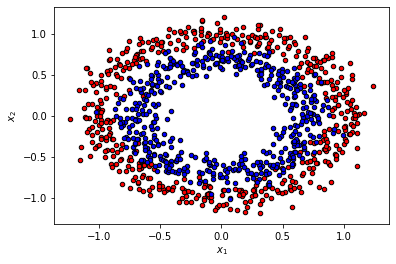

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

### Sprawdźmy jak poradzi sobie pojedyncze drzewo decyzyjne

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


parameter_grid = {'max_depth': np.arange(3, 30)}


clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid, cv=3, iid=False)

clf_grid.fit(X_train, y_train)

print ("The best accuracy {}".format(clf_grid.best_score_))
print ("The best parameters: {}".format(clf_grid.best_params_))

clf_grid.best_estimator_.score(X_test, y_test)

The best accuracy 0.8925168161434978
The best parameters: {'max_depth': 10}


0.8787878787878788

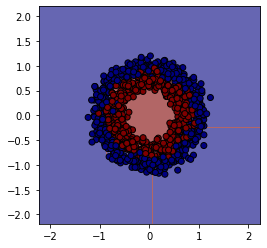

In [5]:
# Parametry
n_classes = 3
plot_step = 0.02


plt.set_cmap(plt.cm.jet)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

clf_tmp = clf_grid.best_estimator_

Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

   
plt.grid(False)

plt.show()


**Krok 1:** Podział danych na dane treningowe i testowe

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

**Krok 2:** Trening klasyfikatora  `RandomForestClassifier` z biblioteki `sklearn`


In [7]:
%%time

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 147 ms


**Krok 3:** Sprawdzenie dokładności modelu

In [8]:
clf.score(X_test, y_test)

0.8909090909090909

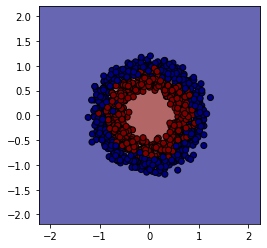

In [9]:
n_classes = 2
plot_step = 0.02


plt.set_cmap(plt.cm.jet)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

clf_tmp = clf

Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

   
plt.grid(False)

plt.show()


## Zależność dokładności od ilości drzew w modelu



In [10]:
train_score = []
test_score = []
for i in range(1, 50, 2):
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

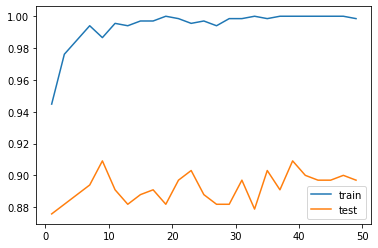

In [11]:
plt.plot(np.arange(1,50, 2), train_score, label='train')
plt.plot(np.arange(1,50, 2), test_score, label='test')
plt.legend()

## Parametry, którymi możemy manipulować

Tak jak w przypadku pojedynczego drzewa możemy zmieniać parametry poszczególnych drzew wykorzystywanych w tym algorytmie. Dodatkowo możemy modyfikować parametr **`n_estimators`,**  który określa ile modeli bazowych będzie budowanych.

## Zadanie 1:
Metodą walidacji krzyżowej znajdź optymalne parametry klasyfikatora `RandomForest`.

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best accuracy on training set 0.9238805970149254
The best parameters: {'max_depth': 11, 'n_estimators': 40}
The model accuracy on test set 0.8939393939393939


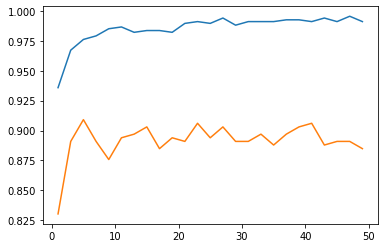

In [12]:
parameter_grid = {'max_depth': np.arange(3, 20),
                 'n_estimators':np.arange(5, 50, 5)}

clf_grid = GridSearchCV(RandomForestClassifier(), parameter_grid, cv=5)

clf_grid.fit(X_train, y_train)

print ("The best accuracy on training set {}".format(clf_grid.best_score_))
print ("The best parameters: {}".format(clf_grid.best_params_))
print ("The model accuracy on test set {}".format(clf_grid.best_estimator_.score(X_test, y_test)))

train_score = []
test_score = []
for i in range(1, 50, 2):
    clf = RandomForestClassifier(n_estimators=i, max_depth=10)
    clf = clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

plt.plot(np.arange(1,50, 2), train_score)
plt.plot(np.arange(1,50, 2), test_score)

## Zadanie 2
Przeprowaź podobną analizę dla danych `iris`

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best accuracy on training set 0.96
The best parameters: {'max_depth': 14, 'max_features': 1, 'n_estimators': 25}
The model accuracy on test set 0.96


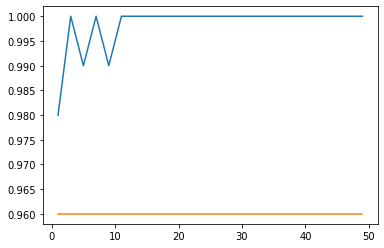

In [15]:
iris = load_iris()
X, y = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=0.33, random_state=1)

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train_iris, y_train_iris)

clf.score(X_test_iris, y_test_iris)

parameter_grid = {'max_depth': np.arange(3, 20),
                  'max_features': np.arange(1, 3),
                  'n_estimators':np.arange(5, 200, 10)}

clf_grid = GridSearchCV(RandomForestClassifier(), parameter_grid, cv=5)

clf_grid.fit(X_train_iris, y_train_iris)

print ("The best accuracy on training set {}".format(clf_grid.best_score_))
print ("The best parameters: {}".format(clf_grid.best_params_))
print ("The model accuracy on test set {}".format(clf_grid.best_estimator_.score(X_test_iris, y_test_iris)))

train_score = []
test_score = []
for i in range(1, 50, 2):
    clf = RandomForestClassifier(n_estimators=i, max_depth=10)
    clf = clf.fit(X_train_iris, y_train_iris)
    train_score.append(clf.score(X_train_iris, y_train_iris))
    test_score.append(clf.score(X_test_iris, y_test_iris))

plt.plot(np.arange(1,50, 2), train_score)
plt.plot(np.arange(1,50, 2), test_score)

## Zadanie 3
Przeprowaź podobną analizę dla danych `breast_cancer`

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best accuracy on training set 0.95
The best parameters: {'max_depth': 4, 'max_features': 1, 'n_estimators': 15}
The model accuracy on test set 0.96


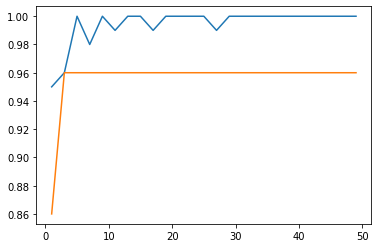

In [16]:
breast = load_breast_cancer()
X_br, y_br = breast.data, breast.target
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X, y, test_size=0.33, random_state=1)

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train_br, y_train_br)

clf.score(X_test_br, y_test_br)

parameter_grid = {'max_depth': np.arange(3, 20),
                  'max_features': np.arange(1, 3),
                  'n_estimators':np.arange(5,200, 10)}

clf_grid = GridSearchCV(RandomForestClassifier(), parameter_grid, cv=5)

clf_grid.fit(X_train_br, y_train_br)

print ("The best accuracy on training set {}".format(clf_grid.best_score_))
print ("The best parameters: {}".format(clf_grid.best_params_))
print ("The model accuracy on test set {}".format(clf_grid.best_estimator_.score(X_test_br, y_test_br)))

train_score = []
test_score = []
for i in range(1, 50, 2):
    clf = RandomForestClassifier(n_estimators=i, max_depth=10)
    clf = clf.fit(X_train_br, y_train_br)
    train_score.append(clf.score(X_train_br, y_train_br))
    test_score.append(clf.score(X_test_br, y_test_br))

plt.plot(np.arange(1,50, 2), train_score)
plt.plot(np.arange(1,50, 2), test_score)